### BUAD 313: Newsvendor Simulation Solution

Python packages for simulation

In [5]:
import numpy as np

Some parameters for our simulation based on the game we played.

In [3]:
# number of replications we will run in simulation
numRep = 10000

p = 25 # sales price
c = 10  # procurement cost
salvage = 5 # salvage value

Simulation code:

In [6]:
# create an array to store the profit for each replication
profit = np.zeros(numRep)

#fix an order quantity and our best estimate of demand distribution for simulation 
q = 100
mean_est = 100
stdev_est = 10

#set the seed for reproducibility
np.random.seed(1234)

In [10]:
for sim in range(numRep):
    # generate a random demand froma normal distribution
    demand = np.random.normal(mean_est, stdev_est)

    profit[sim] = p * min(q, demand) + salvage * max(0, q - demand) - c * q

avg_profit = np.mean(profit)
std_profit = np.std(profit)

conf_int_up = avg_profit + 1.96 * (std_profit / np.sqrt(numRep))
conf_int_down = avg_profit - 1.96 * (std_profit / np.sqrt(numRep))

print((f"Average profit for quantity {q} is: {avg_profit:.2f}"))

print(f"95% confidence interval for average profit: ({conf_int_down:.2f}, {conf_int_up:.2f})")




Average profit for quantity 100 is: 1418.36
95% confidence interval for average profit: (1416.05, 1420.67)


### Try to optimize the q

We're going to "optimize" q in the laziest way possible. We'll consider a grid of possible values, and then evaluate the expected profit for each of them by simulation. It'll be easier to do this though if we define a function first that encapsulates the run of the simulation.


In [11]:
def run_simulation(q):
    for sim in range(numRep):
        demand = np.random.normal(mean_est, stdev_est)

        profit[sim] = p * min(q, demand) + salvage * max(0, q - demand) - c * q

    return np.mean(profit), profit

run_simulation(100)

(1419.8140318066419,
 array([1479.26319621, 1500.        , 1500.        , ..., 1500.        ,
        1270.0244296 , 1374.8281723 ]))

Average profit for order quantity 50 is: 750.00
Average profit for order quantity 60 is: 900.00
Average profit for order quantity 70 is: 1049.91
Average profit for order quantity 80 is: 1198.27
Average profit for order quantity 90 is: 1332.41
Average profit for order quantity 100 is: 1419.64
Average profit for order quantity 110 is: 1433.93
Average profit for order quantity 120 is: 1399.55
Average profit for order quantity 130 is: 1351.78
Average profit for order quantity 140 is: 1296.72
Average profit for order quantity 150 is: 1248.98


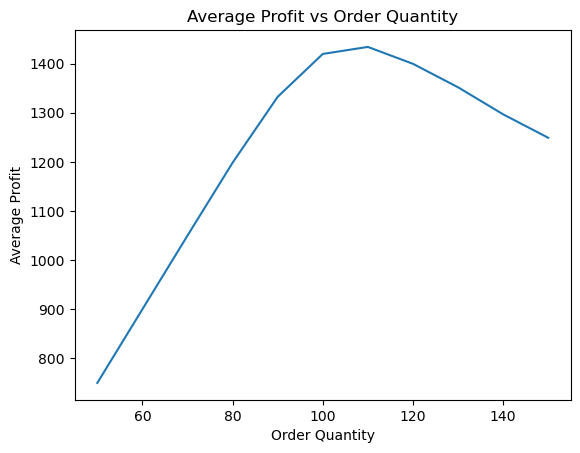

Optimal order quantity: 110


In [16]:
q_grid = np.arange(50, 151, 10)
avg_profit = np.zeros(len(q_grid))

for i in range(len(q_grid)):
    avg_profit[i], profit = run_simulation(q_grid[i])
    print(f"Average profit for order quantity {q_grid[i]} is: {avg_profit[i]:.2f}")

# plot the average profit vs order quantity
import matplotlib.pyplot as plt
plt.plot(q_grid, avg_profit)
plt.xlabel("Order Quantity")
plt.ylabel("Average Profit")
plt.title("Average Profit vs Order Quantity")
plt.show()

q_star = q_grid[np.argmax(avg_profit)]
print(f"Optimal order quantity: {q_star}")


In [15]:
q_grid = np.arange(80, 120, 1)
avg_profit_grid = np.zeros(len(q_grid))
for i in range(len(q_grid)):
    
    q = q_grid[i]
    # run the simulation for each order quantity in the grid
    profit, _ = run_simulation(q, mean_est, stdev_est)
    avg_profit = np.mean(profit)
    avg_profit_grid[i] = avg_profit
    std_profit = np.std(profit)
    confInt = [avg_profit - 1.96 * std_profit / np.sqrt(numRep),
               avg_profit + 1.96 * std_profit / np.sqrt(numRep)]
    print(f"Order Quantity: {q}, Average Profit: {avg_profit}, Standard Deviation of Profit: {std_profit}, 95% Confidence Interval: {confInt}")

TypeError: run_simulation() takes 1 positional argument but 3 were given

### What about Realized Profits?   
Suppose we order 107.  We don't expect to get 1439.2 every time, do we?
Let's make a histogram of the realized profits for 107.